In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt
from pprint import pprint
from datetime import datetime
from dateutil.relativedelta import relativedelta
from sqlalchemy import select


# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
# create engine to hawaii.sqlite
base = automap_base()
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
# reflect the tables
base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
for mappedclass in base.classes:
    print(mappedclass)

<class 'sqlalchemy.ext.automap.measurement'>
<class 'sqlalchemy.ext.automap.station'>


In [8]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station



In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
data = session.query(measurement.date)
df = pd.DataFrame(data, columns=['date'])
df.max()

date    2017-08-23
dtype: object

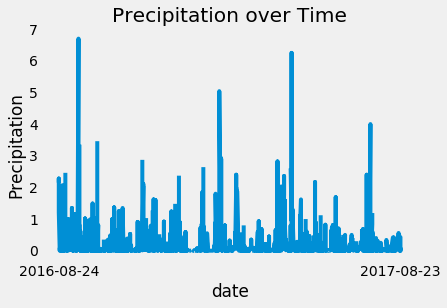

In [41]:


# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
rain_data = session.query(measurement).order_by(measurement.date.desc())
rain_df = pd.DataFrame(rain_data, columns=['date'])

# Calculate the date one year from the last date in data set.
x = datetime.strptime(rain_data[0].date,'%Y-%m-%d')
y = x - relativedelta(years=1)

# Perform a query to retrieve the data and precipitation scores
measurement_data = select(measurement).filter(measurement.date >= y)
measurement_sql = pd.read_sql(measurement_data, session.connection())

# Save the query results as a Pandas DataFrame and set the index to the date column
measurement_df = pd.DataFrame(measurement_sql)

# Sort the dataframe by date
measurement_df.sort_values(['date'], inplace=True, ascending=True)
measurement_df

# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(measurement_df['date'], measurement_df['prcp'])

# Incorporate the other graph properties
plt.title('Precipitation over Time')
plt.xlabel('Date')
plt.xticks(['2016-08-24','2017-08-23'])
plt.ylabel('Precipitation')
plt.grid()

# Show plot
plt.show()


In [43]:
# Use Pandas to calcualte the summary statistics for the precipitation data
measurement_df.describe()

,id,prcp,tobs
count,2223.000000,2015.000000,2223.000000
mean,10159.397211,0.176462,74.578947
std,5604.268703,0.460288,4.612232
min,2365.000000,0.000000,58.000000
25%,5287.500000,0.000000,71.000000
50%,8931.000000,0.020000,75.000000
75%,14751.500000,0.130000,78.000000
max,19550.000000,6.700000,87.000000


# Exploratory Station Analysis

In [50]:
# Design a query to calculate the total number stations in the dataset
station_data = session.query(station.id).count()
station_data

9

In [63]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).all()
active_stations

[('USC00511918', 1979),
 ('USC00513117', 2709),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00517948', 1372),
 ('USC00518838', 511),
 ('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00519523', 2669)]

In [75]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_df = measurement_df.loc[(measurement_df['station'] == 'USC00519281')]
print(active_df['tobs'].max())
print(active_df['tobs'].min())
print(active_df['tobs'].mean())

83.0
59.0
73.0968660968661


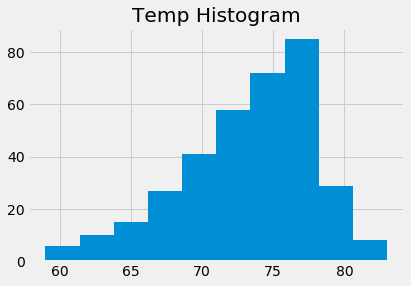

In [93]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
plt.hist(x=active_df['tobs'])

# Incorporate the other graph properties
plt.title('Temp Histogram')

# Show plot
plt.show()

# Close session

In [ ]:
# Close Session
session.close()